<a href="https://colab.research.google.com/github/AtthalaricNero/Salary_Prediction/blob/main/Salary_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/Dataset/Salary_dataset.csv')

df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [13]:
# Load dataset
x = df['YearsExperience'].values #Input/Features
y = df['Salary'].values # Output/Tarfet

print(x)
print(y)

[ 1.2  1.4  1.6  2.1  2.3  3.   3.1  3.3  3.3  3.8  4.   4.1  4.1  4.2
  4.6  5.   5.2  5.4  6.   6.1  6.9  7.2  8.   8.3  8.8  9.1  9.6  9.7
 10.4 10.6]
[ 39344.  46206.  37732.  43526.  39892.  56643.  60151.  54446.  64446.
  57190.  63219.  55795.  56958.  57082.  61112.  67939.  66030.  83089.
  81364.  93941.  91739.  98274. 101303. 113813. 109432. 105583. 116970.
 112636. 122392. 121873.]


In [41]:

w = 0 # slope
b = 0 # bias

alpha = 0.01 #learning rate
epochs = 10000 # jumlah iterasi

In [23]:
# model
def f_w_b(w, b, x):
  model = w * x + b # bentuk model dari regression

  return model

# cost function
def compute_cost(x, y, w, b):
    m = x.shape[0] # jumlah total data
    cost = 0

    for i in range(m):
      f_w_b_i = f_w_b(w, b, x[i]) # mencari prediksi untuk tiap data x
      cost = cost + (f_w_b_i - y[i]) ** 2 # menguadratkan prediksinya

    total_cost = 1 / (2 * m) * cost # mengkalikan dengan 1/2m

    return total_cost

# gradient descent
def compute_gradient(x, y, w, b):
  m = x.shape[0]
  dj_dw = 0 # turunan dari cost function terhadap w
  dj_db = 0 # turunan dari cost function terhadap b

  for i in range(m):
    f_w_b_i = f_w_b(w, b, x[i])
    dj_dw += (f_w_b_i - y[i]) * x[i]
    dj_db += f_w_b_i - y[i]

  dj_dw = dj_dw / m
  dj_db = dj_db / m

  return dj_dw, dj_db

In [42]:
# training the model
for epoch in range(epochs):
  dj_dw, dj_db = compute_gradient(x, y, w, b)

  w = w - alpha * dj_dw
  b = b - alpha * dj_db

  if epoch % 100 == 0:
    cost = compute_cost(x, y, w, b)
    print(f"Epoch {epoch} : Cost {cost:.4f} w : {w:.4f} b: {b:.4f}")

print(f"Final Parameter w = {w:.4f} b = {b:.4f}")

Epoch 0 : Cost 1297963218.5636 w : 4850.0441 b: 760.0400
Epoch 100 : Cost 52175120.5904 w : 12188.3276 b: 6190.3086
Epoch 200 : Cost 39850504.7091 w : 11679.1761 b: 9659.4206
Epoch 300 : Cost 31682912.1855 w : 11264.6925 b: 12483.5114
Epoch 400 : Cost 26270202.5097 w : 10927.2749 b: 14782.5115
Epoch 500 : Cost 22683169.2499 w : 10652.5942 b: 16654.0524
Epoch 600 : Cost 20306022.0579 w : 10428.9857 b: 18177.6127
Epoch 700 : Cost 18730673.1935 w : 10246.9533 b: 19417.8935
Epoch 800 : Cost 17686680.6073 w : 10098.7666 b: 20427.5655
Epoch 900 : Cost 16994820.8266 w : 9978.1327 b: 21249.5065
Epoch 1000 : Cost 16536321.4440 w : 9879.9286 b: 21918.6219
Epoch 1100 : Cost 16232471.3146 w : 9799.9838 b: 22463.3269
Epoch 1200 : Cost 16031108.1185 w : 9734.9034 b: 22906.7534
Epoch 1300 : Cost 15897663.5917 w : 9681.9236 b: 23267.7324
Epoch 1400 : Cost 15809229.1504 w : 9638.7944 b: 23561.5937
Epoch 1500 : Cost 15750623.1468 w : 9603.6843 b: 23800.8166
Epoch 1600 : Cost 15711784.6174 w : 9575.1024 

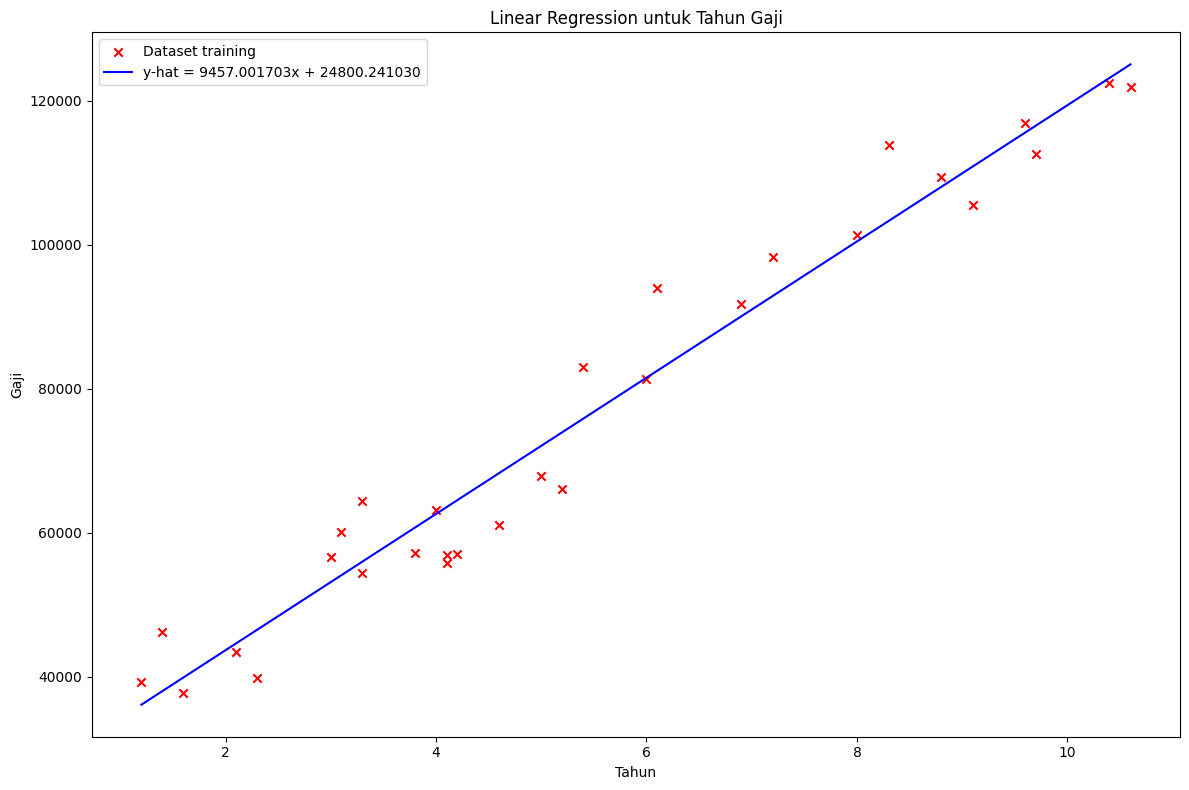

In [35]:
plt.figure(figsize=(12,8))

plt.scatter(x, y, color="red", marker='x', label="Dataset training")

x_line = np.linspace(x.min(), x.max())
y_line = w * x_line + b
plt.plot(x_line, y_line, color="blue", label=f"y-hat = {w:2f}x + {b:2f}")

plt.xlabel("Tahun")
plt.ylabel("Gaji")
plt.legend()
plt.title("Linear Regression untuk Tahun Gaji")
plt.tight_layout()
plt.show()

In [45]:
tahun = 1.2
prediksi = f_w_b(w, b, tahun)

print(f"Prediksi kerja {tahun} tahun adalah {prediksi}")

Prediksi kerja 1.2 tahun adalah 36188.15873024037


In [51]:
prediction = w * x + b
cost = np.abs(prediction - y)
print(np.mean(cost))

4644.20128894293


In [50]:
# Hitung R^2 score
ss_res = np.sum((y - prediction) ** 2)
ss_tot = np.sum((y - np.mean(y)) ** 2)

r2 = 1 - (ss_res / ss_tot)

print(f"R^2 score : {r2:4f}")

R^2 score : 0.956957
